In [81]:
library(jsonlite)
library(sp)
library(httr)
#install.packages("rgdal")
library(rgdal)

In [83]:
agol_url <- "https://learngis.maps.arcgis.com/"
un <- "gbrunner_LearnGIS"
pw <- "Pirates##2020"

In [84]:
# function to get a token from ArcGIS Online from username and password
get_token <- function(url, username, password){
  resp <- POST(
    url = paste(url,"/sharing/rest/generateToken?", sep=""),
    query = list(username = username,
                password = password,
                referer = "https://www.arcgis.com",
                f = "json") 
    #config = list(),
    #handle = NULL
  )
  token <-fromJSON(content(resp))
  return(token$token)
}


tk <- get_token(agol_url, un, pw)
print(tk)

[1] "w4bCpMR0pqMSKEdcNbX8EXz902ekjikQJUdH4TVaa8K5w0ZBA5AJfXtz4TbiIMQnUuRfB74dr1i1iV00rIVtNL1THI1_p_PhM0hTz_lWly_hwpD-UnrknM6VOD0pDMsRfxGCDUz6n6ZBRXE5upwUaE54aEuoYa6ziZEYf9mrV4I7ogcsS_CTpZKm2pr5oZoD"


In [85]:
search <- function(url, token, q){
  resp <- POST(
    url = paste(url,"/sharing/rest/search?", sep=""),
    query = list(num=10,
                start=0,
                sortField="title",
                sortOrder="asc",
                type = "feature service",
                q = q,
                f = "json",
                token=token) 

  )
  obj_list <-fromJSON(content(resp))
  return(obj_list)  
}

items <- search(agol_url, tk, "owner:gbrunner_LearnGIS AND NJ AND type:feature service")
print(items)

$query
[1] "owner:gbrunner_LearnGIS AND NJ AND type:feature service"

$total
[1] 4

$start
[1] 1

$num
[1] 10

$nextStart
[1] -1

$results
                                id             owner      created isOrgItem
1 1cd43deff37b4b73bf7694aece23c0ff gbrunner_LearnGIS 1.599610e+12      TRUE
2 9791fd31b5164264bcce64d2b50b0326 gbrunner_LearnGIS 1.599845e+12      TRUE
3 b14ac19176394f78a987669a4d7e474d gbrunner_LearnGIS 1.614031e+12      TRUE
4 d9ef288a28504ad5ae6d6919e920ff79 gbrunner_LearnGIS 1.599574e+12      TRUE
      modified guid name                             title            type
1 1.599610e+12   NA   NA              NJ_Demographic_Layer Feature Service
2 1.599845e+12   NA   NA              NJ_Demographic_Layer Feature Service
3 1.614731e+12   NA   NA NJ_Demographic_Layer_YOURINITIALS Feature Service
4 1.599574e+12   NA   NA                   NJ_Demographics Feature Service
                                                                                          typeKeywords
1 A

In [86]:
items$results

id,owner,created,isOrgItem,modified,guid,name,title,type,typeKeywords,...,listed,ownerFolder,protected,numComments,numRatings,avgRating,numViews,scoreCompleteness,groupDesignations,contentOrigin
1cd43deff37b4b73bf7694aece23c0ff,gbrunner_LearnGIS,1.599610e+12,TRUE,1.599610e+12,NA,NA,NJ_Demographic_Layer,Feature Service,"ArcGIS Server , Data , Feature Access , Feature Service, Metadata , Service , Singlelayer , Hosted Service",...,FALSE,NA,FALSE,0,0,0,0,25,NA,self
9791fd31b5164264bcce64d2b50b0326,gbrunner_LearnGIS,1.599845e+12,TRUE,1.599845e+12,NA,NA,NJ_Demographic_Layer,Feature Service,"ArcGIS Server , Data , Feature Access , Feature Service, Metadata , Service , Singlelayer , Hosted Service",...,FALSE,NA,FALSE,0,0,0,0,25,NA,self
b14ac19176394f78a987669a4d7e474d,gbrunner_LearnGIS,1.614031e+12,TRUE,1.614731e+12,NA,NA,NJ_Demographic_Layer_YOURINITIALS,Feature Service,"ArcGIS Server , Data , Feature Access , Feature Service, Metadata , Service , Singlelayer , Hosted Service",...,FALSE,NA,FALSE,0,0,0,4,41,NA,self
d9ef288a28504ad5ae6d6919e920ff79,gbrunner_LearnGIS,1.599574e+12,TRUE,1.599574e+12,NA,NA,NJ_Demographics,Feature Service,"ArcGIS Server , Data , Feature Access , Feature Service, Metadata , Service , Singlelayer , Hosted Service",...,FALSE,NA,FALSE,0,0,0,3,25,NA,self


In [87]:
items$results$url[2]

[1] "https://services2.arcgis.com/j80Jz20at6Bi0thr/arcgis/rest/services/a2fca3/FeatureServer"

In [88]:
item_url <- items$results$url[2]

"https://services2.arcgis.com/j80Jz20at6Bi0thr/ArcGIS/rest/services/aa298b/FeatureServer/0/query?where=1%3D1&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token="

In [99]:
# function to get a SpatialXDataFrame from a service URL
spdf_from_layer <- function(service_url, token){
    print(paste(service_url,"/0/query?", sep=""))
    r <- GET(
        url = paste("https://services2.arcgis.com/j80Jz20at6Bi0thr/arcgis/rest/services/a2fca3/FeatureServer/0/query?", sep=""),
        query = list(outFields="*",
                    f = "geojson",
                    token=token,
                    where="1=1") 
    )
    mydata<- readOGR(content(r))
    return(mydata)
}

spdf <- spdf_from_layer(item_url, tk)
#spdf <- as.data.frame(spdf)

[1] "https://services2.arcgis.com/j80Jz20at6Bi0thr/arcgis/rest/services/a2fca3/FeatureServer/0/query?"
OGR data source with driver: GeoJSON 
Source: "{"type":"FeatureCollection","features":[{"type":"Feature","id":1,"geometry":{"type":"MultiPolygon","coordinates":[[[[-74.6529825170755,39.2895541641693],[-74.6579771500552,39.2914382831476],[-74.6562703510154,39.2943929801908],[-74.6541054111807,39.2950047607032],[-74.6521111512499,39.2947058231661],[-74.6527220056431,39.292800935393],[-74.6510421560618,39.2909863773129],[-74.6529825170755,39.2895541641693]]],[[[-74.6166456638329,39.2971598540146],[-74.6208138467512,39.297451829296],[-74.6208946951268,39.3008998262291],[-74.6235626915206,39.2985223949097],[-74.6219187745507,39.301643625878],[-74.6117228960759,39.3013725222485],[-74.6166456638329,39.2971598540146]]],[[[-74.6712542499545,39.2985571532591],[-74.6852589852339,39.3005522535902],[-74.6833725231373,39.3040487556889],[-74.6787641657297,39.3013447166886],[-74.6766441416592,39.3046

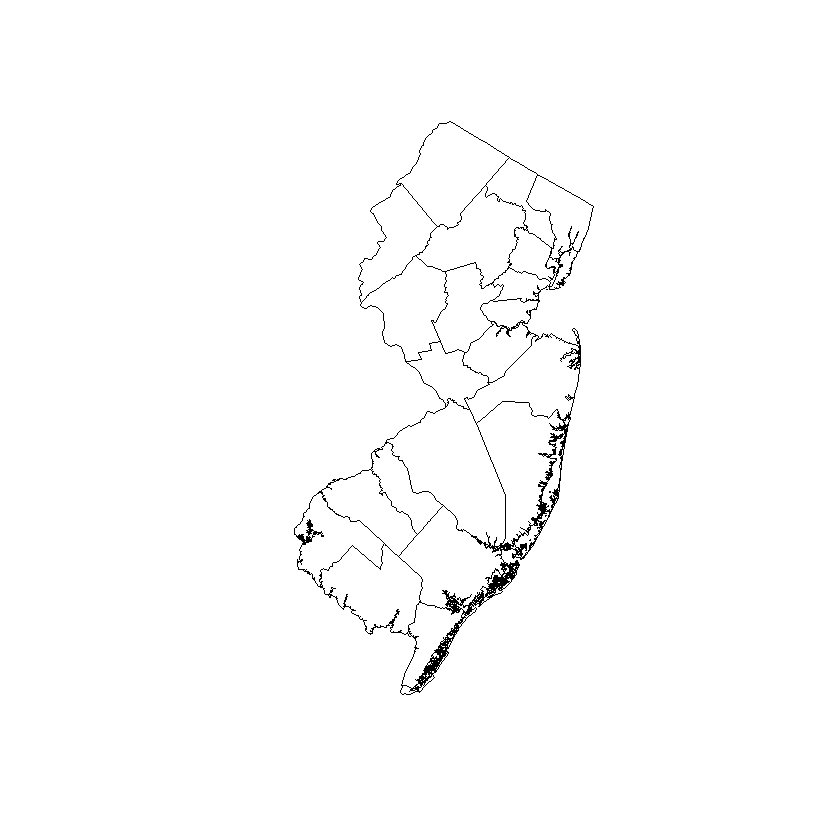

In [96]:
plot(spdf)

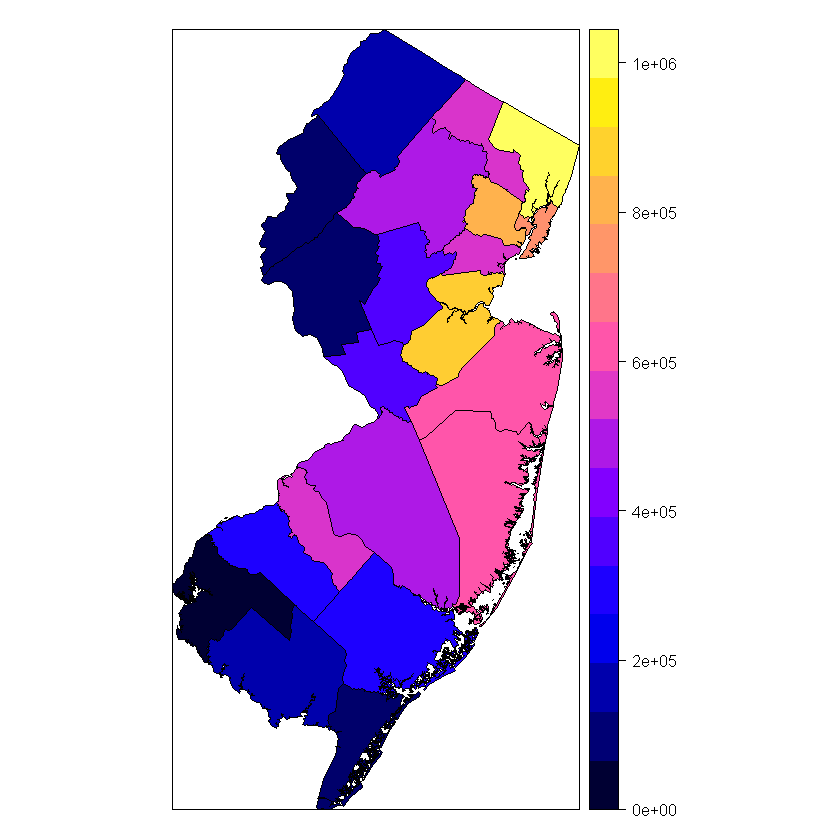

In [97]:
spplot(spdf, "TOTPOP_FY")